In [1]:
### Bike rental prediction on the basis of seasional and environmental changes
### lets start by importing the required libraries

import os                                              ## interaction with local system and directories
import pandas as pd                                 ## for data processing. i/o operations
import numpy as np                                  ## linear algebric operations
import matplotlib.pyplot as plt                     ## plots and data visualisation
import seaborn as sns                               ## plots and data visualisation
from collections import Counter                         ## counting operations
from sklearn.model_selection import train_test_split     ## splitting/dividing the data in test and train
from sklearn.linear_model import LinearRegression       ## model development 
from sklearn.tree import DecisionTreeRegressor          ## model development           
from sklearn.ensemble import RandomForestRegressor       ## model development
from sklearn.ensemble import GradientBoostingRegressor   ## model development
from sklearn.metrics import mean_squared_error           ## error metrics
from sklearn.metrics import r2_score                     ## regression score function

In [2]:
os.chdir("C:/Users/17519")  ## setting the directory

In [3]:
day=pd.read_csv("day.csv")  ## importing the data 

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
day.shape  ### 731 rows and 16 columns ( numerical and categorical variables)

(731, 16)

In [6]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
### data pre processing and data exploration
## converting the data into required data types
day['dteday'] = pd.to_datetime(day['dteday'],yearfirst = True)
day['season'] = day['season'].astype(str)
day['yr']     = day['yr'].astype(str)
day['mnth']   = day['mnth'].astype(str)
day['holiday']= day['holiday'].astype(str)
day['weekday']= day['weekday'].astype(str)
day['workingday']= day['workingday'].astype(str)
day['weathersit']=day['weathersit'].astype(str)

In [9]:
day.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
day.isnull().sum()  ### missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

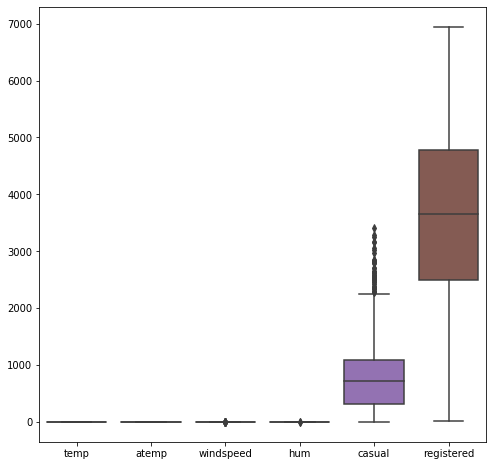

In [11]:
##### outlier analysis using boxplots for continous variables

%matplotlib inline
sns.boxplot(data=day[['temp','atemp','windspeed','hum','casual','registered']])
fig=plt.gcf()
fig.set_size_inches(8,8)

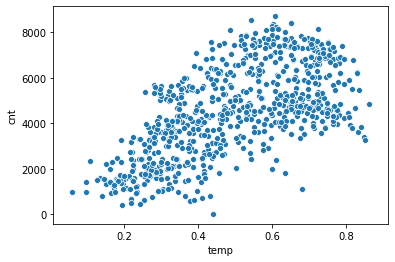

In [12]:
### relation between continous variables and target variables
sns.scatterplot(data=day,x='temp',y='cnt')  ### between temp and cnt

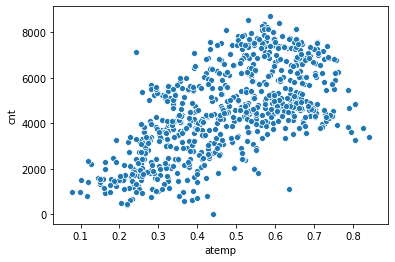

In [13]:
sns.scatterplot(data=day,x='atemp',y='cnt')

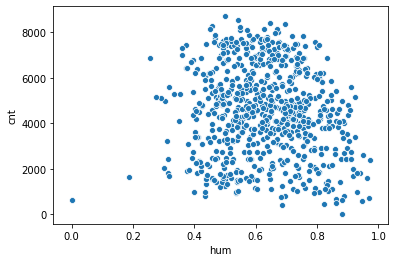

In [14]:
sns.scatterplot(data=day,x='hum',y='cnt')

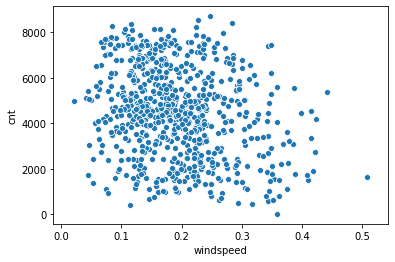

In [15]:
sns.scatterplot(data=day,x='windspeed',y='cnt')

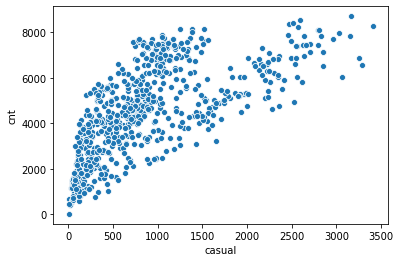

In [16]:
sns.scatterplot(data=day,x='casual',y='cnt')

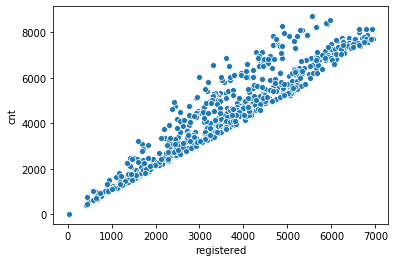

In [17]:
sns.scatterplot(data=day,x='registered',y='cnt')

In [18]:
# it is found that windspeed, hum and casual have outliers.
# casual is not predictor variable so for now ignored it.
## replacing the outliers with Na values 

count_names = ['windspeed','hum']
for i in count_names:
    print (i)
    q75,q25 = np.percentile(day.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    day.loc[day[i]<min,i]=np.nan
    day.loc[day[i]>max,i]=np.nan

windspeed
-0.012446750000000034
0.38061125
hum
0.20468725
1.0455212500000002


In [19]:
day.isnull().sum() ### shows missing values, 2 in hum and 13 in windspeed

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

In [20]:
#taking copy of the data

day_copy = day.copy()

In [21]:
day = day.dropna(axis = 0) ## removing the outliers

In [22]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

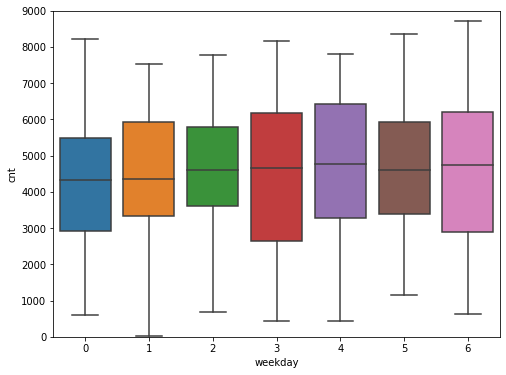

In [23]:
## boxplots for categorical variables 
weekdays = 'weekday'
data = pd.concat([day['cnt'], day[weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

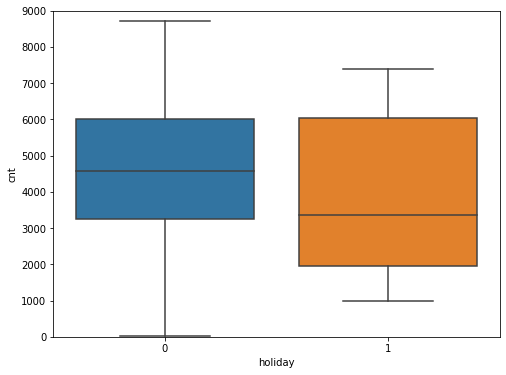

In [24]:
holidays = 'holiday'
data = pd.concat([day['cnt'], day[holidays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=holidays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

In [25]:
numeric_day = day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [26]:
### co relation plot to check co relation between numerical/continous variables
numeric_day.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.11,-0.14,0.54,0.54,0.63
atemp,0.99,1.0,0.13,-0.17,0.54,0.54,0.63
hum,0.11,0.13,1.0,-0.2,-0.1,-0.12,-0.14
windspeed,-0.14,-0.17,-0.2,1.0,-0.15,-0.2,-0.22
casual,0.54,0.54,-0.1,-0.15,1.0,0.39,0.67
registered,0.54,0.54,-0.12,-0.2,0.39,1.0,0.94
cnt,0.63,0.63,-0.14,-0.22,0.67,0.94,1.0


In [27]:
# cheking multicolinerity by VIF(variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_day = add_constant(day.iloc[:,9:15])
pd.Series([variance_inflation_factor(VIF_day.values, i) 
               for i in range(VIF_day.shape[1])], 
              index=VIF_day.columns)

C:\Users\17519\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         54.847289
temp          63.442490
atemp         64.309759
hum            1.179328
windspeed      1.154450
casual         1.502061
registered     1.561168
dtype: float64

In [28]:
# chi square test for categorical variables

# saving categorical variables name in categ

categ = []
for i in range(0, day.shape[1]):
    if(day.iloc[:,i].dtypes == 'object'):
        categ.append(day.columns[i])
categ

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [29]:
from scipy.stats import chi2_contingency
## for taking out the p values every combination of categorical variables are used
factors_paired = [(i,j) for i in categ for j in categ]
factors_paired
p_values = [] 
from scipy.stats import chi2_contingency 
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(day[factor[0]], day[factor[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-') 
p_values = np.array(p_values).reshape((7,7))
p_values = pd.DataFrame(p_values, index=categ, columns=categ)
print(p_values)

           season     yr   mnth holiday weekday workingday weathersit
season          -  0.999    0.0   0.641     1.0      0.946      0.013
yr          0.999      -    1.0   0.995     1.0      0.956      0.183
mnth          0.0    1.0      -   0.571     1.0      0.993       0.01
holiday     0.641  0.995  0.571       -     0.0        0.0      0.599
weekday       1.0    1.0    1.0     0.0       -        0.0      0.249
workingday  0.946  0.956  0.993     0.0     0.0          -      0.294
weathersit  0.013  0.183   0.01   0.599   0.249      0.294          -


In [30]:
#heat map and vif suggests atemp is highly corelated to temp
#chi^2 test suggests to remove weekday and holiday as the do not contribute much.
#casual and registered are removed as they sum up to count.
#instant is index and dteday is date which is not useful for building regression model.

day = day.drop(columns=['instant','dteday','atemp','casual','registered','holiday','weekday'])

In [31]:
day.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,1,0.226957,0.436957,0.186900,1600


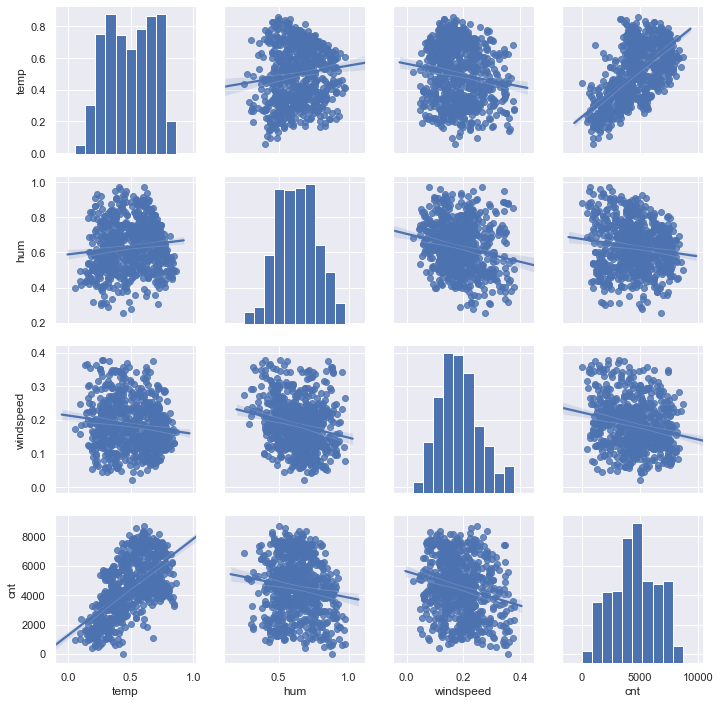

In [32]:
sns.set()### relation between the variables
cols = ['temp','hum', 'windspeed','cnt']
sns.pairplot(numeric_day[cols], height = 2.5,kind="reg")
plt.show();

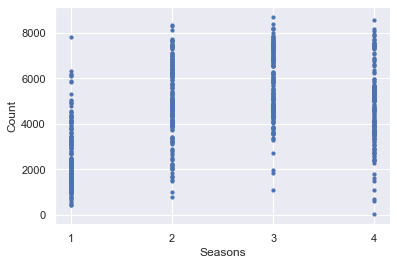

In [33]:
# check relationship between count and categorical variables 
## season and cnt
plt.scatter(x=day['season'], y=day['cnt'], s=10)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

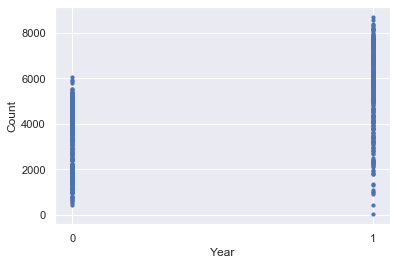

In [34]:
# count and year
plt.scatter(x=day['yr'], y=day['cnt'], s=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

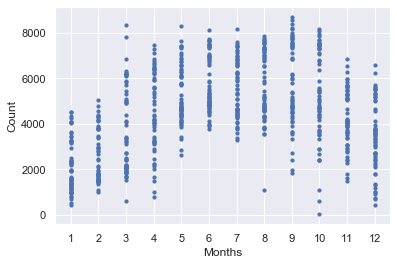

In [35]:
# count and months
plt.scatter(x=day['mnth'], y=day['cnt'], s=10)
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

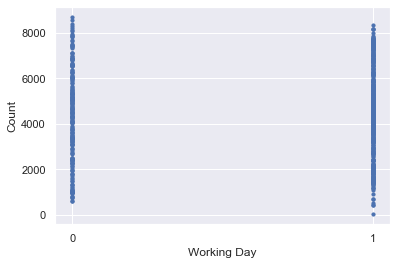

In [36]:
# cnt and workingday
plt.scatter(x=day['workingday'], y=day['cnt'], s=10)
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

In [37]:
## splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(day, test_size=0.2)

In [38]:
train.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
306,4,0,11,1,1,0.408333,0.702083,0.136817,3974
704,4,1,12,1,1,0.438333,0.485000,0.324021,5729
569,3,1,7,1,1,0.741667,0.694167,0.138683,6966
300,4,0,10,1,2,0.330833,0.585833,0.229479,3747
116,2,0,4,1,2,0.620000,0.835417,0.312200,3872


In [39]:
### MODEL generation
train_ft_1 = train[['season','yr','mnth','weathersit','temp','hum','windspeed']].values
train_tgt = train['cnt'].values
test_ft = test[['season','yr','mnth','weathersit','temp','hum','windspeed']].values
test_tgt= test['cnt'].values
train_ft_1

array([['4', '0', '11', ..., 0.408333, 0.702083, 0.136817],
       ['4', '1', '12', ..., 0.438333, 0.485, 0.324021],
       ['3', '1', '7', ..., 0.741667, 0.694167, 0.138683],
       ...,
       ['3', '1', '7', ..., 0.720833, 0.6675, 0.15173699999999998],
       ['2', '1', '5', ..., 0.6, 0.45625, 0.083975],
       ['2', '1', '3', ..., 0.484167, 0.48125, 0.291671]], dtype=object)

In [40]:
LR = LinearRegression().fit(train_ft_1 ,train_tgt)

In [41]:
pred_train_LR = LR.predict(train_ft_1)
pred_test_LR = LR.predict(test_ft)

In [42]:
RMSE_train_LR= np.sqrt(mean_squared_error(train_tgt, pred_train_LR))

# calculate RMSE on test data
RMSE_test_LR = np.sqrt(mean_squared_error(test_tgt, pred_test_LR))
print("training data rmse = "+str(RMSE_train_LR))
print("test data rmse= "+str(RMSE_test_LR))

training data rmse = 910.2095615984606
test data rmse= 802.0889000812862


In [43]:
# calculate R^2 on train data
train_LR = r2_score(train_tgt, pred_train_LR)
# calculate R^2 on test data
test_LR = r2_score(test_tgt, pred_test_LR)

print("training r2 = "+str(train_LR))
print("test r2 = "+str(test_LR))

training r2 = 0.7895782154586652
test r2 = 0.7755791182043209


In [44]:
errors = abs(pred_test_LR - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

MAPE = 17.51
Accuracy = 82.49%.


In [45]:
### decision tree model
from sklearn.tree import DecisionTreeRegressor
D_tree = DecisionTreeRegressor()
D_tree = D_tree.fit(train_ft_1, train_tgt)
print(D_tree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [46]:
predict_DT = D_tree.predict(test_ft)
print(predict_DT)

[3623. 5046.  795. 5923. 4744. 6153. 4338. 3129. 4308. 8090. 6855. 8555.
 7384. 4274. 7582. 4790. 3974. 2765. 4634. 2177. 3542. 6824. 5668. 5992.
 7733. 1526. 5668. 3894. 7384. 1708. 6536.  605. 4585.   22. 5062. 3129.
 6597. 4629. 4075. 2424. 4648. 4911. 4189. 3351. 7375. 4266. 3956. 7852.
 6883. 1834. 2743. 6998. 7261. 5204. 4120. 4744. 2425. 4985. 1096. 4906.
 4763. 5202. 6786. 3956. 7129. 2703. 4367. 5687. 4105. 7436. 4150.  822.
 7148. 5611. 4010. 5041. 4352. 2999. 6569. 6565. 4586. 1471. 5362. 6772.
 3907. 4911. 1996. 4075. 2918. 5260. 5923. 4086. 4862. 3614. 8555. 5342.
 4120. 3071. 3922. 7572. 2133. 4773. 7359. 1321. 4773. 6784. 5870. 4727.
 4717. 5035. 8294. 4401. 4548. 6857. 8120. 3392. 5633. 4760. 4367. 4352.
 5260. 6421. 7605. 3840. 4186. 6883. 5992. 5532. 2594. 3163. 3126. 6591.
 3747. 3542. 3598. 2311. 4098. 1471. 5976. 2843. 3958. 3956. 3907. 7105.]


In [47]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
MAPE(test_tgt, predict_DT)

16.70518821693581

In [48]:
errors = abs(predict_DT - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

MAPE = 16.71
Accuracy = 83.29%.


In [53]:
rss= (test_tgt-predict_DT).sum()
print(rss)

MSE = np.mean(test_tgt-predict_DT)
print(MSE)

905.0
6.284722222222222


In [54]:
rmse=np.sqrt(MSE)
print(rmse)

2.506934826081887


In [49]:
max_depth = 8
min_samples_split =4
D_tree_2 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
D_tree_2 = D_tree_2.fit(train_ft_1, train_tgt)
print(D_tree_2)

predict_DT_2 = D_tree_2.predict(test_ft)

print(predict_DT_2)

MAPE(test_tgt,predict_DT_2)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
[3433.         4832.08333333  700.         4832.08333333 4832.08333333
 6469.83333333 4832.08333333 3057.         4306.         7828.86363636
 7260.02083333 7828.86363636 6737.89473684 4832.08333333 7260.02083333
 4832.08333333 4388.9375     2385.33333333 4832.08333333 2259.33333333
 3968.875      7284.25       5403.875      5403.875      7828.86363636
 1380.         5403.875      4553.6        6737.89473684 1708.
 5403.875       700.         4244.75         22.         4979.66666667
 3057.         7260.02083333 4832.08333333 4207.         2420.
 4832.08333333 4842.         3184.5        3609.         7260.02083333
 4388.9375     3493.      

15.948104843031958

In [50]:
errors = abs(predict_DT_2 - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

MAPE = 15.95
Accuracy = 84.05%.


In [51]:
rss= (test_tgt-predict_DT_2).sum()
print(rss)

MSE = np.mean(test_tgt-predict_DT_2)
print(MSE)

5919.365090533836
41.106702017596085


In [52]:
rmse=np.sqrt(MSE)
print(rmse)

6.411450851218941


In [55]:
### random forest model
from sklearn.ensemble import RandomForestRegressor

In [56]:
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_ft_1,train_tgt)
RF_predict_one= RF_model_one.predict(test_ft)

In [57]:
def RMSE(y_test,y_predict):
    mse = np.mean(y_test-y_predict)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

In [58]:
RMSE(test_tgt,RF_predict_one)

Mean Square :  3.0912777777777922
Root Mean Square :  1.7582029967491786


1.7582029967491786

In [59]:
MAPE(test_tgt,RF_predict_one)

14.374174158646333

In [60]:
errors = abs(RF_predict_one - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

MAPE = 14.37
Accuracy = 85.63%.


In [61]:
# GRADIENT BOOSTING MODEL
GB = GradientBoostingRegressor().fit(train_ft_1, train_tgt)
# predict on train data
train_GB = GB.predict(train_ft_1)

# predict on test data
test_GB = GB.predict(test_ft)

In [62]:
# RMSE on train data
RMSE_train_GB = np.sqrt(mean_squared_error(train_tgt, train_GB))
# RMSE on test data
RMSE_test_GB = np.sqrt(mean_squared_error(test_tgt, test_GB))
print("training rmse = "+str(RMSE_train_GB))
print("test rmse = "+str(RMSE_test_GB))

training rmse = 429.1444865932088
test rmse = 684.0966697404792


In [63]:
# R^2 of train data
r2_train_GB = r2_score(train_tgt, train_GB)
# R^2 of test data
r2_test_GB = r2_score(test_tgt, test_GB)

In [64]:
print("r^2 train data = "+str(r2_train_GB))
print("r^2 test data = "+str(r2_test_GB))

r^2 train data = 0.9532248717091775
r^2 test data = 0.8367499945775301


In [65]:
errors = abs(test_GB - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

MAPE = 14.65
Accuracy = 85.35%.


In [66]:
### cross validation hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [68]:
### hyperparameter tuning on Randomforest using randomisedSearchCV
RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

RCV_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
RCV_rf = RCV_rf.fit(train_ft_1, train_tgt)
predictions_RFR = RCV_rf.predict(test_ft)

best_params_RFR = RCV_rf.best_params_

best_estimator_RFR = RCV_rf.best_estimator_

predictions_RFR = best_estimator_RFR.predict(test_ft)

# calculate R^2
RFR_r2 = r2_score(test_tgt, predictions_RFR)

# calculate RMSE
RFR_rmse = np.sqrt(mean_squared_error(test_tgt, predictions_RFR))

# calculate mape and accuracy
errors = abs(predictions_RFR - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape

print('RandomizedSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_RFR)
print('R-squared = {:0.2}.'.format(RFR_r2))
print('RMSE = ',RFR_rmse)
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

RandomizedSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.83.
RMSE =  688.201574846633
MAPE = 14.46
Accuracy = 85.54%.


In [69]:
# Gradientboosting model hyperparameter tuning by randomisedsearchCV

GBR = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

RCV_GB = RandomizedSearchCV(GBR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
RCV_GB = RCV_GB.fit(train_ft_1, train_tgt)
predictions_gb = RCV_GB.predict(test_ft)

best_params_gb = RCV_GB.best_params_

best_estimator_gb = RCV_GB.best_estimator_

predictions_gb = best_estimator_gb.predict(test_ft)

# calculate R^2
GB_r2 = r2_score(test_tgt, predictions_gb)

# calculate RMSE
GB_rmse = np.sqrt(mean_squared_error(test_tgt, predictions_gb))

# calculate mape and accuracy
errors = abs(predictions_gb - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape

print('RandomizedSearchCV - Gradient Boosting Model Performance:')
print('Best Parameters = ',best_params_gb)
print('R-squared = {:0.2}.'.format(GB_r2))
print('RMSE = ', GB_rmse)
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

RandomizedSearchCV - Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  810.7275156370196
MAPE = 17.34
Accuracy = 82.66%.


In [70]:
###hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

### 1. GridSearchCV on Random Forest Model

rfr_gs = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(rfr_gs, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(train_ft_1,train_tgt)

best_params_GRF = gridcv_rf.best_params_
best_estimator_GRF = gridcv_rf.best_estimator_

#Apply model on test data
predictions_GRF = best_estimator_GRF.predict(test_ft)

# calculate R^2
GRF_r2 = r2_score(test_tgt, predictions_GRF)

# calculate RMSE
GRF_rmse = np.sqrt(mean_squared_error(test_tgt, predictions_GRF))

# calculate mape and accuracy
errors = abs(predictions_GRF - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape

print('GridSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

GridSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 9, 'n_estimators': 17}
R-squared = 0.83.
RMSE =  701.1655257383472
MAPE = 14.71
Accuracy = 85.29%.


In [71]:
# 2. GridSearchCV on gradient boosting model

gbr_gs = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gbr_gs, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(train_ft_1,train_tgt)

best_params_Ggb = gridcv_gb.best_params_
best_estimator_Ggb = gridcv_gb.best_estimator_

#Apply model on test data
predictions_Ggb = best_estimator_Ggb.predict(test_ft)

# calculate R^2
Ggb_r2 = r2_score(test_tgt, predictions_Ggb)

# calculate RMSE
Ggb_rmse = np.sqrt(mean_squared_error(test_tgt, predictions_Ggb))

# calculate mape and accuracy
errors = abs(predictions_Ggb - test_tgt)
mape = 100 * np.mean(errors / test_tgt)
accuracy = 100 - mape

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))
print('MAPE = {:0.2f}'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.81.
RMSE =  733.2511004937871
MAPE = 16.03
Accuracy = 83.97%.
